In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.tsa.stattools import coint
from statsmodels.regression.rolling import RollingOLS

In [137]:
# Loading the api keys from your local .env file
import os
from dotenv import load_dotenv, find_dotenv

load_dotenv(find_dotenv())

binance_api_key = os.getenv('binanceAPIKey')
binance_secret_key = os.getenv('binanceSecretKey')

In [138]:
from binance.client import Client
client = Client(binance_api_key, 
                binance_secret_key,
                tld='us')

In [139]:
coin_1 = "FORTHUSD"
coin_2 = "ZENUSD"

In [140]:
klines_1 = client.get_historical_klines(coin_1, Client.KLINE_INTERVAL_1DAY, "1 Oct, 2022", "1 Oct, 2023")
coin_1_df = pd.DataFrame(klines_1, columns = ['timestamp', 'open', 'high', 'low', 'close', 
                                        'volume', 'close_time', 'quote_av', 'trades', 
                                        'tb_base_av', 'tb_quote_av', 'ignore' ])
coin_1_df['timestamp'] = pd.to_datetime(coin_1_df['timestamp'], unit='ms')
coin_1_df.set_index('timestamp', inplace=True)
coin_1_df['close'] = coin_1_df['close'].astype(float)
coin_1_df

,open,high,low,close,volume,close_time,quote_av,trades,tb_base_av,tb_quote_av,ignore
timestamp,,,,,,,,,,,
2022-10-01,4.6900,4.8900,4.6600,4.720,1493.11000000,1664668799999,7123.8657,43,665.70000000,3223.5903,0
2022-10-02,4.7300,4.7300,4.6100,4.610,385.38000000,1664755199999,1777.8218,15,16.91000000,79.0032,0
2022-10-03,4.6000,4.7000,4.6000,4.700,154.28000000,1664841599999,720.6714,10,45.16000000,209.8125,0
2022-10-04,4.6800,4.8900,4.6600,4.760,1736.41000000,1664927999999,8317.2410,61,1031.29000000,4936.6399,0
2022-10-05,4.7100,4.7600,4.7000,4.760,353.12000000,1665014399999,1671.2635,13,317.57000000,1502.9979,0
...,...,...,...,...,...,...,...,...,...,...,...
2023-06-23,2.22700000,2.22700000,2.22500000,2.225,24.44000000,1687564799999,54.40436000,5,0.00000000,0.00000000,0
2023-06-24,2.22500000,2.22500000,2.22500000,2.225,0.00000000,1687651199999,0.00000000,0,0.00000000,0.00000000,0
2023-06-25,2.22500000,2.22500000,2.22500000,2.225,0.00000000,1687737599999,0.00000000,0,0.00000000,0.00000000,0


In [141]:
klines_2 = client.get_historical_klines(coin_2, Client.KLINE_INTERVAL_1DAY, "1 Oct, 2022", "1 Oct, 2023")
coin_2_df = pd.DataFrame(klines_2, columns = ['timestamp', 'open', 'high', 'low', 'close', 
                                        'volume', 'close_time', 'quote_av', 'trades', 
                                        'tb_base_av', 'tb_quote_av', 'ignore' ])
coin_2_df['timestamp'] = pd.to_datetime(coin_2_df['timestamp'], unit='ms')
coin_2_df.set_index('timestamp', inplace=True)
coin_2_df['close'] = coin_2_df['close'].astype(float)
coin_2_df

,open,high,low,close,volume,close_time,quote_av,trades,tb_base_av,tb_quote_av,ignore
timestamp,,,,,,,,,,,
2022-10-01,14.1490,14.1730,13.7760,13.942,554.54600000,1664668799999,7706.9278,57,85.92600000,1200.6065,0
2022-10-02,13.9130,13.9130,13.4360,13.473,470.64400000,1664755199999,6415.9302,68,201.97300000,2760.1971,0
2022-10-03,13.4730,14.0920,13.3060,14.047,252.79700000,1664841599999,3490.4037,63,116.92400000,1615.9087,0
2022-10-04,14.0810,14.5350,14.0000,14.326,1155.23300000,1664927999999,16501.8029,108,502.82800000,7199.7539,0
2022-10-05,14.2600,14.2650,13.7220,13.962,1673.40400000,1665014399999,23357.3717,105,609.67500000,8533.1574,0
...,...,...,...,...,...,...,...,...,...,...,...
2023-06-23,6.60000000,6.99000000,5.85000000,6.770,36.23000000,1687564799999,238.61440000,18,26.68000000,180.27040000,0
2023-06-24,6.74000000,6.88000000,6.60000000,6.870,7.54000000,1687651199999,51.45300000,9,4.91000000,33.68040000,0
2023-06-25,7.00000000,7.42000000,6.52000000,6.520,437.31000000,1687737599999,3103.23440000,314,317.82000000,2250.35120000,0


In [142]:
len(coin_1_df)

270

In [143]:
len(coin_2_df)

270

In [144]:
S1 = coin_1_df['close'].copy()
S2 = coin_2_df['close'].copy()

In [145]:
# Do coint test
score, pvalue, _ = coint(S1, S2)
print(pvalue)

0.00022670429400145726


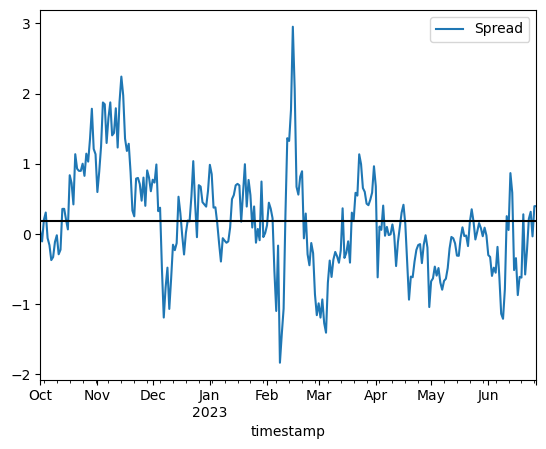

In [146]:
S1 = sm.add_constant(S1)
results = sm.OLS(S2, S1).fit()
S1 = S1['close']
b = results.params['close']

spread = S2 - b * S1
spread.plot()
plt.axhline(spread.mean(), color='black')
plt.legend(['Spread'])

In [147]:
b

2.945404191596687

In [148]:
np.mean(S1)

3.404348148148147

In [149]:
np.mean(S2)

10.211177777777774

In [150]:
def zscore(series):
    return (series - series.mean()) / np.std(series)

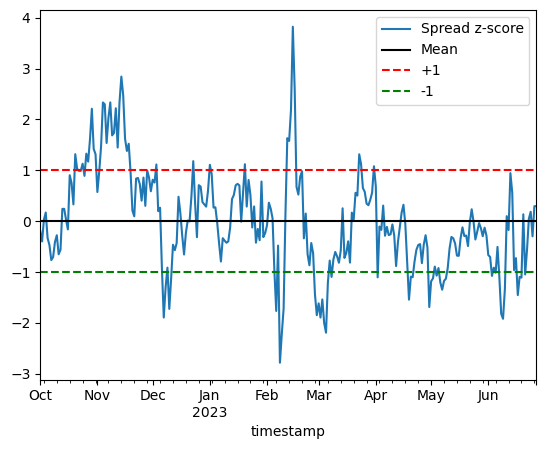

In [151]:
zscore(spread).plot()
plt.axhline(zscore(spread).mean(), color='black')
plt.axhline(1.0, color='red', linestyle='--')
plt.axhline(-1.0, color='green', linestyle='--')
plt.legend(['Spread z-score', 'Mean', '+1', '-1'])

In [152]:
# Now basically we need to do Rolling...

In [153]:
# When we get the next 2 price points:
'''
- Maintain a certain window length
- Maintain 2 lists of size window length (make sure these start with window_length prices before doing anything)
- Maintain a list of size window length that holds spread values (this should also start out with window_length spread values)

- Add new 2 prices to both lists
- Remove first prices from both lists
- Make sure coint test still passes
- Redo regression to get new beta, use new beta to get new spread
- Add this new spread value to the spread window, pop the first value
- With the new updated spread window list, get the current average of it
- With the new updated spread window list, get the current standard deviation of it
- Use the new average and std to get the new upper and lower bounds
- Just check if the current value of the spread is past a bound; if so, buy/sell
'''

'\n- Maintain a certain window length\n- Maintain 2 lists of size window length (make sure these start with window_length prices before doing anything)\n- Maintain a list of size window length that holds spread values (this should also start out with window_length spread values)\n\n- Add new 2 prices to both lists\n- Remove first prices from both lists\n- Make sure coint test still passes\n- Redo regression to get new beta, use new beta to get new spread\n- Add this new spread value to the spread window, pop the first value\n- With the new updated spread window list, get the current average of it\n- With the new updated spread window list, get the current standard deviation of it\n- Use the new average and std to get the new upper and lower bounds\n- Just check if the current value of the spread is past a bound; if so, buy/sell\n'

In [154]:
window_size = 30 # Can tune this; in practice this should be bigger probably? Depends on time granularity as well.

coin_1_prices_window = []
coin_2_prices_window = []

# First fill up the windows
coin_1_prices_window = list(coin_1_df['close'][:30])
coin_2_prices_window = list(coin_2_df['close'][:30])

In [155]:
# Track our betas, avgs, and stds
betas = []
avgs = []
stds = []

# Other stuff
pvals = []
spread_values_window = []
signals = []
upper_bounds = []
lower_bounds = []
all_spread_values = []

In [156]:
# Run test

S1 = coin_1_prices_window.copy()
S2 = coin_2_prices_window.copy()
S1 = sm.add_constant(S1)
results = sm.OLS(S2, S1).fit()
S1 = coin_1_prices_window.copy()
first_beta = results.params[1] # Double check that this is the right way to get beta_1
betas.append(first_beta)

products = [first_beta * val for val in S1]
differences = [S2[i] - products[i] for i in range(len(S1))]
spread_values_window = differences # So spread_values_window should start with 30 values
all_spread_values = differences.copy()

first_std = np.std(spread_values_window) # Get initial std
stds.append(first_std)

In [157]:
num_days = len(coin_1_df['close'])
print("Total number of days: ", num_days)
if num_days != len(coin_2_df['close']):
    print("coin dfs do not have the same amount of close prices")

# Update our stuff as we get new prices
for i in range(30, num_days):
    coin_1_new_price = list(coin_1_df['close'])[i] # This would be replaced by some call that gets the latest price point
    coin_2_new_price = list(coin_2_df['close'])[i] # This would be replaced by some call that gets the latest price point

    coin_1_prices_window.append(coin_1_new_price)
    coin_2_prices_window.append(coin_2_new_price)

    coin_1_prices_window.pop(0)
    coin_2_prices_window.pop(0)

    # Run coint test
    _, pvalue, _ = coint(coin_1_prices_window, coin_2_prices_window)
    pvals.append(pvalue)
    # if pvalue > 0.05:
    #     print("pvalue is greater than 0.05")

    S1 = coin_1_prices_window.copy()
    S2 = coin_2_prices_window.copy()
    S1 = sm.add_constant(S1)
    results = sm.OLS(S2, S1).fit()
    new_beta = results.params[1] # Double check that this is the right way to get beta_1

    new_spread_single_value = coin_2_new_price - b * coin_1_new_price
    spread_values_window.append(new_spread_single_value)
    all_spread_values.append(new_spread_single_value)
    
    spread_values_window.pop(0) # Keep spread list at length 30 since we keep getting its new stds

    new_avg = np.mean(spread_values_window)
    avgs.append(new_avg)

    new_std = np.std(spread_values_window)
    stds.append(new_std)

    new_upper_bound = new_avg + new_std * 1 # Can change this factor 
    new_lower_bound = new_avg + new_std * -1

    upper_bounds.append(new_upper_bound)
    lower_bounds.append(new_lower_bound)
    
    if new_spread_single_value > new_upper_bound:
        signals.append("sell")
    elif new_spread_single_value < new_lower_bound:
        signals.append("buy")

Total number of days:  270


In [158]:
len(stds)

241

In [159]:
len(spread_values_window)

30

In [160]:
len(signals)

95

In [161]:
print(len(upper_bounds))
print(len(lower_bounds))
print(len(all_spread_values))

240
240
270


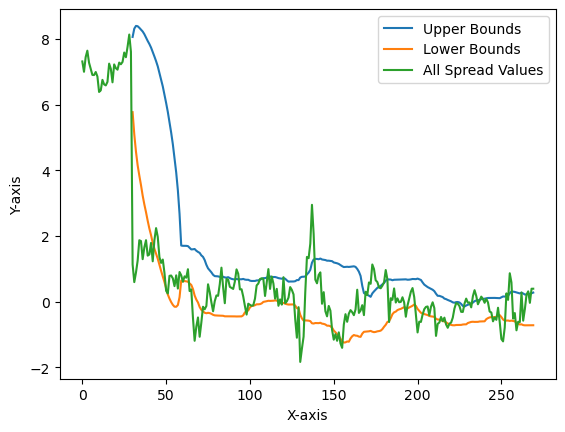

In [162]:
# Plot the new bounds we get over time
# Plot the new spread values we get over time
len_diff = len(all_spread_values) - len(upper_bounds)

upper_bounds_plot = list([None] * len_diff) + upper_bounds
lower_bounds_plot = list([None] * len_diff) + lower_bounds

# Create a line plot for each set of data
plt.plot(upper_bounds_plot, label='Upper Bounds')
plt.plot(lower_bounds_plot, label='Lower Bounds')
plt.plot(all_spread_values, label='All Spread Values')

plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()

plt.show()

In [163]:
trimmed_spread_list = all_spread_values[30:]
len(trimmed_spread_list)

240

In [164]:
buy_count = 0
sell_count = 0
for i in range(len(trimmed_spread_list)):
    if trimmed_spread_list[i] > upper_bounds[i]:
        sell_count += 1
    elif trimmed_spread_list[i] < lower_bounds[i]:
        buy_count += 1
print("Buy Count: ", buy_count)
print("Sell Count: ", sell_count)

Buy Count:  58
Sell Count:  37


In [165]:
print("Number of signals we generated during the actual algo: ", len(signals))
print("Double-checking how many buy and sell counts we got: ", buy_count + sell_count)

Number of signals we generated during the actual algo:  95
Double-checking how many buy and sell counts we got:  95


In [166]:
signals

['buy',
 'buy',
 'buy',
 'buy',
 'buy',
 'buy',
 'buy',
 'buy',
 'buy',
 'buy',
 'buy',
 'buy',
 'buy',
 'buy',
 'buy',
 'buy',
 'buy',
 'buy',
 'buy',
 'buy',
 'buy',
 'buy',
 'buy',
 'sell',
 'sell',
 'sell',
 'buy',
 'sell',
 'sell',
 'sell',
 'sell',
 'buy',
 'buy',
 'sell',
 'buy',
 'buy',
 'buy',
 'buy',
 'buy',
 'sell',
 'sell',
 'sell',
 'sell',
 'sell',
 'buy',
 'buy',
 'buy',
 'buy',
 'buy',
 'buy',
 'sell',
 'sell',
 'sell',
 'sell',
 'sell',
 'sell',
 'sell',
 'sell',
 'sell',
 'buy',
 'buy',
 'buy',
 'buy',
 'buy',
 'buy',
 'buy',
 'buy',
 'buy',
 'buy',
 'buy',
 'buy',
 'buy',
 'sell',
 'sell',
 'sell',
 'sell',
 'sell',
 'sell',
 'sell',
 'sell',
 'buy',
 'buy',
 'buy',
 'buy',
 'buy',
 'buy',
 'buy',
 'sell',
 'sell',
 'sell',
 'buy',
 'sell',
 'sell',
 'sell',
 'sell']